In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path ="/Users/meijiaojiao/Desktop/Evolution_algorithm/TDK paper/Data/Lamarck/Lamarck_rawdata.csv"
lamarck = pd.read_csv(path, header=0, index_col=[0,1])
print(lamarck)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/TDK paper/Data/SSGA/SSGA_rawdata.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0,1])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/TDK paper/Data/Baldwin/Baldwin_rawdata.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([SSGA,baldwin,lamarck],axis=0,keys=["SSGA","Baldwin","Lamarck"])
print(df_together.shape)
print(df_together)

                   590        593        579        588        589        591  \
F1  Times1    0.002860   0.002471   0.001030   0.002377   0.002108   0.001700   
    Times2    0.001824   0.001727   0.001236   0.003462   0.003075   0.002476   
    Times3    0.002365   0.002970   0.001647   0.002308   0.002058   0.002677   
    Times4    0.002543   0.001552   0.001222   0.001627   0.003379   0.001500   
    Times5    0.001582   0.003094   0.001051   0.002270   0.002220   0.001603   
...                ...        ...        ...        ...        ...        ...   
F23 Times6   -5.128481 -10.536275 -10.536204 -10.536211  -5.175647 -10.536320   
    Times7  -10.536327 -10.536247 -10.536257 -10.536290 -10.536232 -10.536286   
    Times8  -10.536338 -10.536284  -5.175647 -10.536248 -10.536310 -10.536342   
    Times9  -10.536332 -10.536272 -10.536271 -10.536216 -10.536355 -10.536374   
    Times10 -10.536385 -10.536224 -10.536212 -10.536300 -10.536269 -10.536327   

                   576     

SSGA     F1   Times1   590     0.004679
                       593     0.001876
                       579     0.000664
                       588     0.001125
                       589     0.001367
                                ...    
Lamarck  F23  Times10  562   -10.536314
                       575   -10.536256
                       573   -10.536328
                       552   -10.536210
                       555   -10.536280
Length: 13800, dtype: float64

,Function,Combinations,Algorithm,Times,Solutions
0,F1,590,SSGA,Times1,0.004679
1,F1,593,SSGA,Times1,0.001876
2,F1,579,SSGA,Times1,0.000664
3,F1,588,SSGA,Times1,0.001125
4,F1,589,SSGA,Times1,0.001367
...,...,...,...,...,...
13795,F23,562,Lamarck,Times10,-10.536314
13796,F23,575,Lamarck,Times10,-10.536256
13797,F23,573,Lamarck,Times10,-10.536328
13798,F23,552,Lamarck,Times10,-10.536210


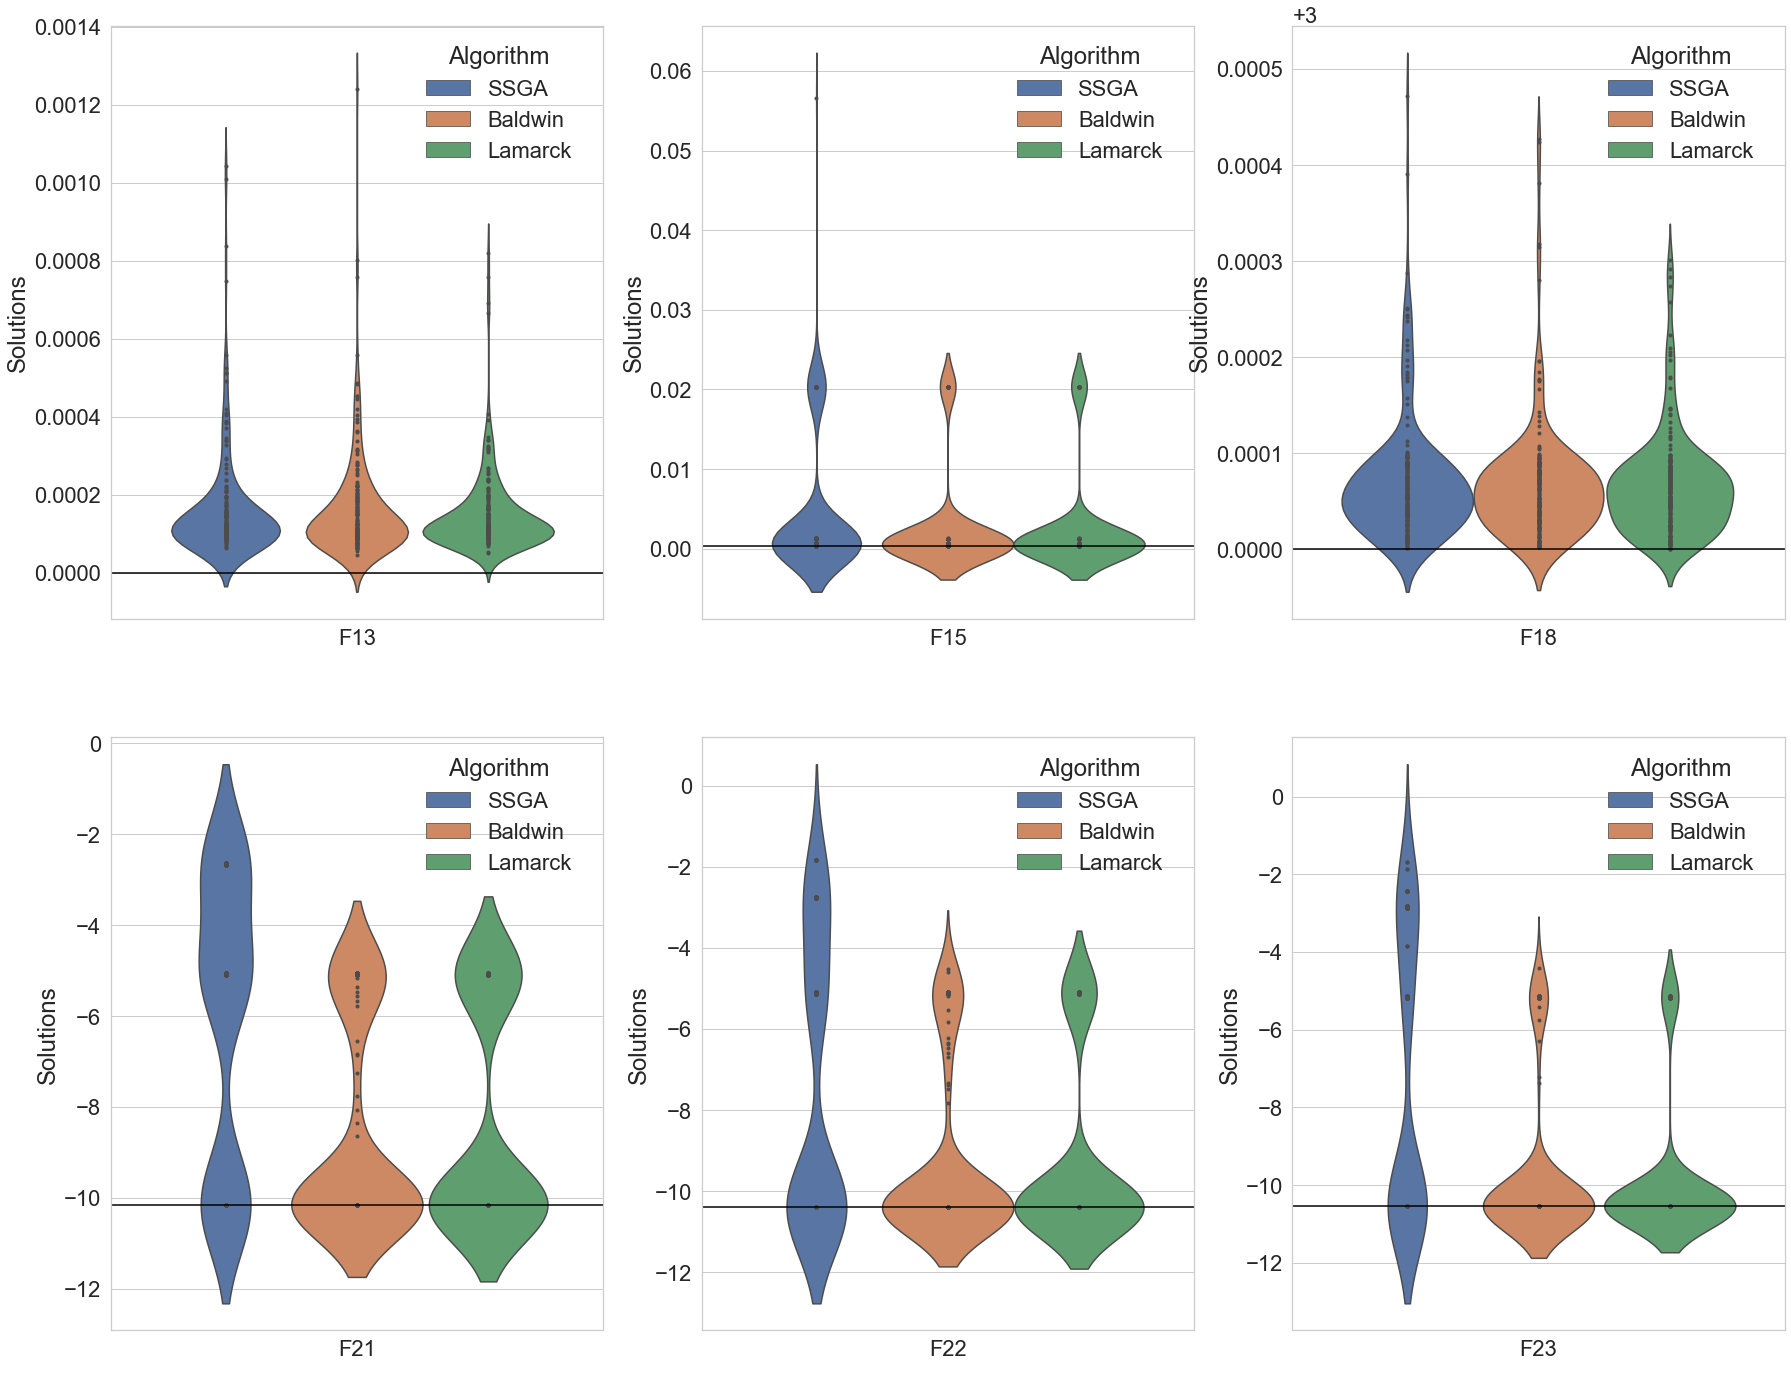

In [3]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Algorithm","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Solutions")
dataframe["Solutions"] = dataframe["Solutions"].replace("NAN", 0)
dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in [13,15,18,21,22,23]]
# function_list = ["F" + str(i) for i in [20]]
# function_list = ["F" + str(i) for i in range(1,24,1)]
# opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
#        -3.86, -3.32, -10.1532,-10.4028, -10.5363]
opt = [0,0.0003,3,-10.1532, -10.4028, -10.5363]
# opt = [-3.32]
def show_graph(dataframe):
    # palette = {"SSGA":"darkgray",
    #        "Baldwin":"dimgrey",
    #        "Lamarck":"black"}
    # sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_theme(style="whitegrid",font_scale=2)
    dist_cols = 3
    dist_rows = 2
    plt.figure(figsize=(10 * dist_cols, 12 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.violinplot(data=dataf, y="Solutions",x="Function",hue="Algorithm",inner="points")
        # ax = sns.boxplot(data=dataf, y="Solutions",x="Function",hue="Algorithm",width=0.4)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6,1), frameon=False)
        # plt.axhline(y=opt[i-1],color="red")
        plt.axhline(y=opt[i-1],color="black")
        plt.xlabel(" ")
        plt.ylabel("Solutions")
        i = i + 1
    plt.savefig("./violin_plots_3_nnn.png", dpi=600, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [11]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Algorithm","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Solutions")
dataframe["Solutions"] = dataframe["Solutions"].replace("NAN", 0)
dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
Combinations_list=["590","579","588","589","569","558","542","562"]
# I want the dataframe which only contains the combinations in the list
dataframe = dataframe[dataframe["Combinations"].isin(Combinations_list)]
display(dataframe)

SSGA     F1   Times1   590     0.004679
                       593     0.001876
                       579     0.000664
                       588     0.001125
                       589     0.001367
                                ...    
Lamarck  F23  Times10  562   -10.536314
                       575   -10.536256
                       573   -10.536328
                       552   -10.536210
                       555   -10.536280
Length: 13800, dtype: float64

,Function,Combinations,Algorithm,Times,Solutions
0,F1,590,SSGA,Times1,0.004679
1,F1,593,SSGA,Times1,0.001876
2,F1,579,SSGA,Times1,0.000664
3,F1,588,SSGA,Times1,0.001125
4,F1,589,SSGA,Times1,0.001367
...,...,...,...,...,...
13795,F23,562,Lamarck,Times10,-10.536314
13796,F23,575,Lamarck,Times10,-10.536256
13797,F23,573,Lamarck,Times10,-10.536328
13798,F23,552,Lamarck,Times10,-10.536210


,Function,Combinations,Algorithm,Times,Solutions
0,F1,590,SSGA,Times1,0.004679
2,F1,579,SSGA,Times1,0.000664
3,F1,588,SSGA,Times1,0.001125
4,F1,589,SSGA,Times1,0.001367
8,F1,569,SSGA,Times1,0.000608
...,...,...,...,...,...
13784,F23,589,Lamarck,Times10,-10.536269
13788,F23,569,Lamarck,Times10,-10.536281
13789,F23,558,Lamarck,Times10,-10.536261
13793,F23,542,Lamarck,Times10,-10.536323


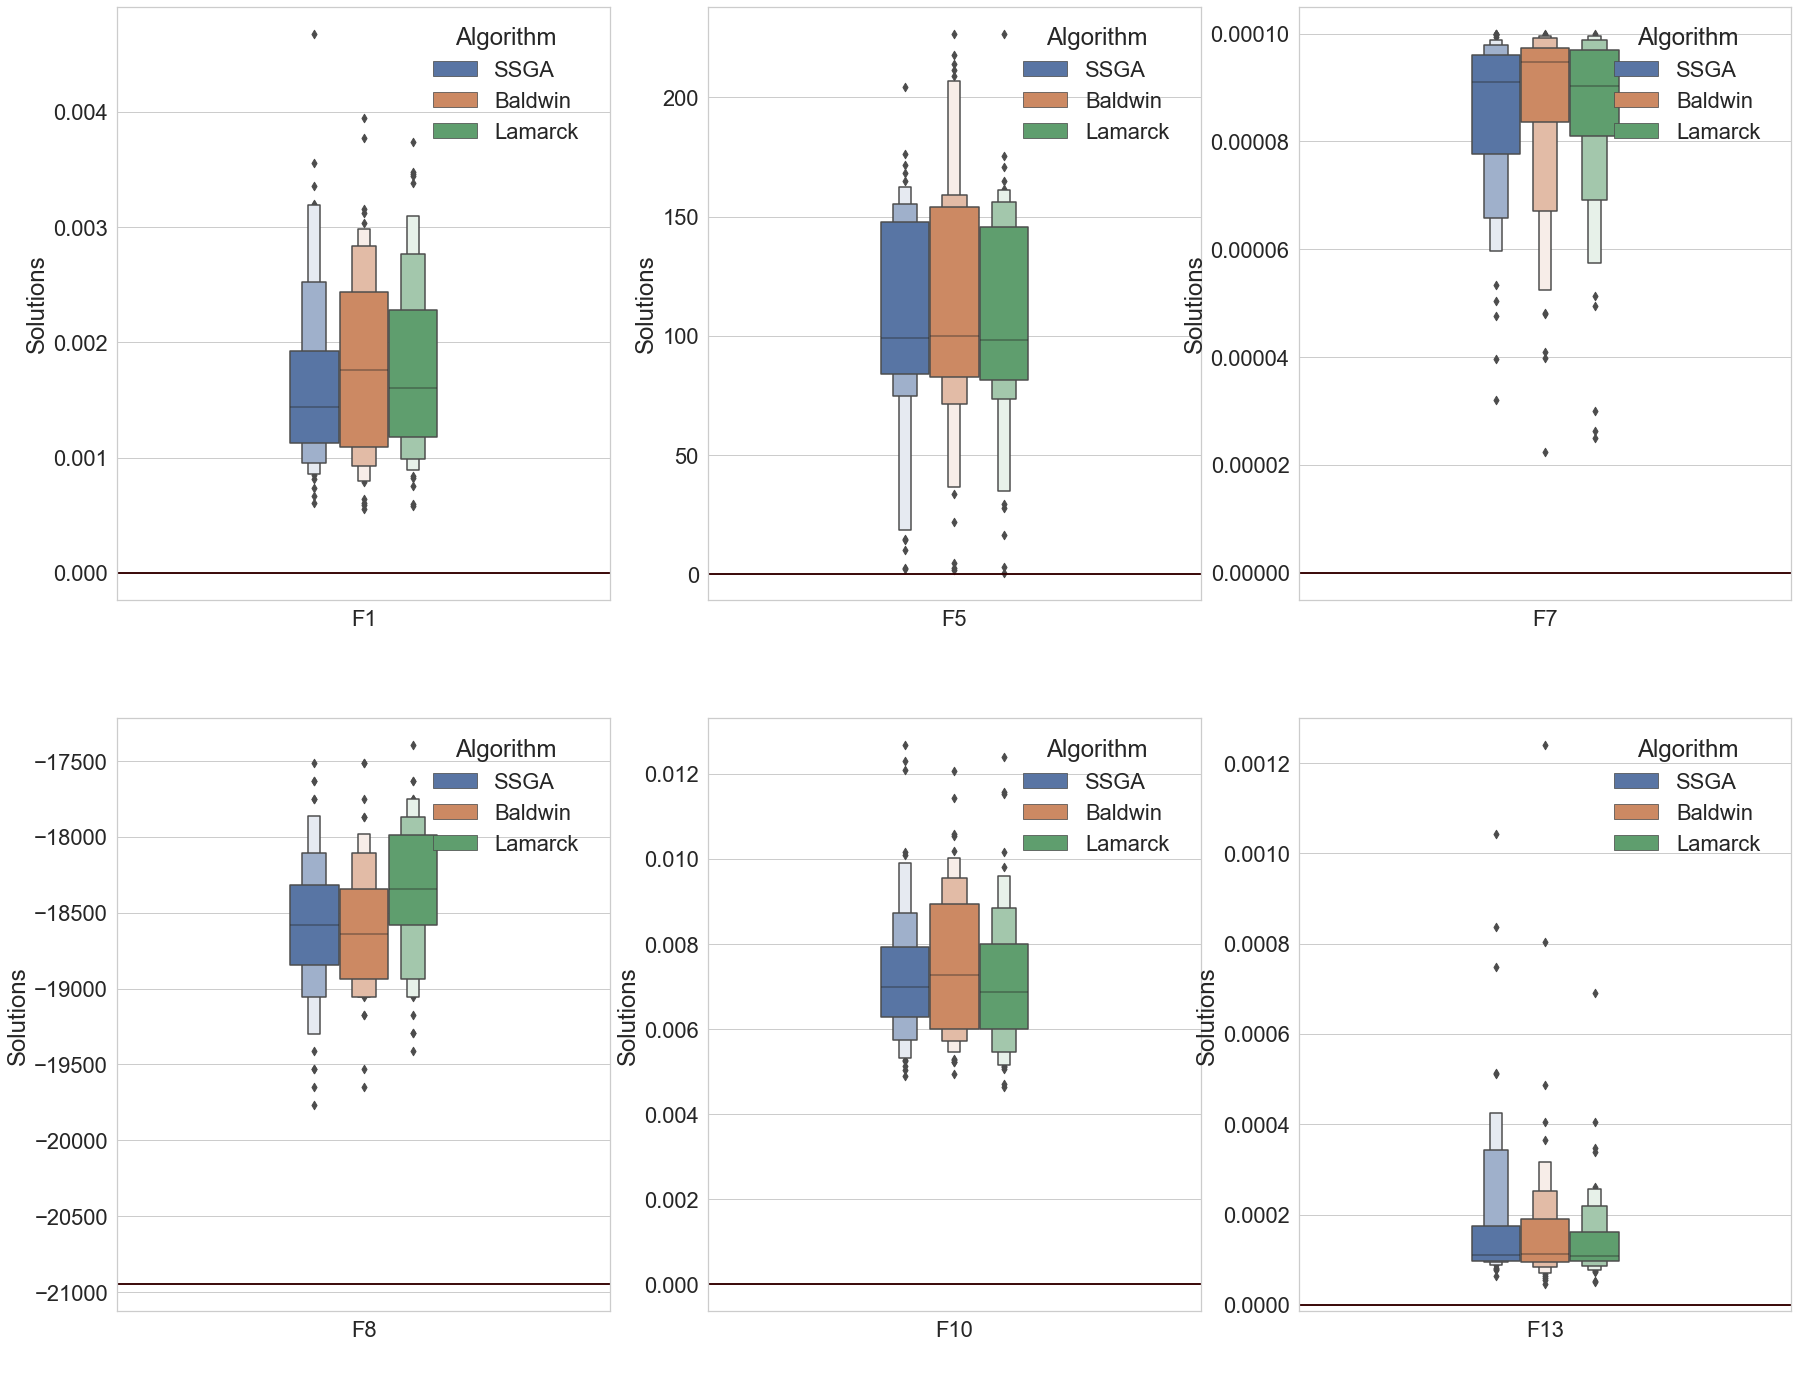

In [13]:
function_list = ["F" + str(i) for i in [1,5,7,8,10,13]]
# function_list = ["F" + str(i) for i in [20]]
# function_list = ["F" + str(i) for i in range(1,24,1)]
# opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
#        -3.86, -3.32, -10.1532,-10.4028, -10.5363]
opt = [0,0,0,-418.98 * 50,0,0]
# opt = [-3.32]
def show_graph(dataframe):
    # palette = {"SSGA":"darkgray",
    #        "Baldwin":"dimgrey",
    #        "Lamarck":"black"}
    # sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_theme(style="whitegrid",font_scale=2)
    dist_cols = 3
    dist_rows = 2
    plt.figure(figsize=(10 * dist_cols, 12 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.boxenplot(data=dataf, y="Solutions",x="Function",hue="Algorithm",width=0.3)
        # ax = sns.boxplot(data=dataf, y="Solutions",x="Function",hue="Algorithm",width=0.4)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6,1), frameon=False)
        plt.axhline(y=opt[i-1],color="red")
        plt.axhline(y=opt[i-1],color="black")
        plt.xlabel(" ")
        plt.ylabel("Solutions")
        i = i + 1
    plt.savefig("./experiment15use8unique.png", dpi=600, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)